In [1]:
# Import navis
import navis

# Import the actual neuromorpho interface
import navis.interfaces.neuromorpho as nm

In [7]:
fields = nm.get_neuron_fields()
fields[:10]

['neuron_id',
 'neuron_name',
 'archive',
 'age_scale',
 'gender',
 'reference_pmid',
 'reference_doi',
 'note',
 'age_classification',
 'brain_region']

In [8]:
species = nm.get_available_field_values('species')
species[:10]

['mouse',
 'rat',
 'drosophila melanogaster',
 'human',
 'zebrafish',
 'monkey',
 'chimpanzee',
 'Xenopus laevis',
 'Semipalmated sandpiper',
 'C. elegans']

In [9]:
# Note that we're only fetching the first couple results
info = nm.find_neurons(species='human', page_limit=10)
info.head()

,neuron_id,neuron_name,archive,note,age_scale,gender,age_classification,brain_region,cell_type,species,...,slicing_thickness,min_age,max_age,min_weight,max_weight,png_url,reference_pmid,reference_doi,physical_Integrity,_links
0,102399,H17-03-010-11-13-01_656411100_m,Allen Cell Types,,Year,Female,adult,"[neocortex, occipital, middle temporal gyrus]","[interneuron, Aspiny]",human,...,350,38.0,38.0,Not Reported,Not Reported,http://neuromorpho.org/images/imageFiles/Allen...,[27810003],[10.1016/j.neuron.2016.10.019],"Dendrites Complete, Axon Incomplete",{'self': {'href': 'http://neuromorpho.org/api/...
1,102400,H17-03-010-11-13-06_651089035_m,Allen Cell Types,,Year,Female,adult,"[neocortex, occipital, middle temporal gyrus]","[principal cell, Spiny]",human,...,350,38.0,38.0,Not Reported,Not Reported,http://neuromorpho.org/images/imageFiles/Allen...,[27810003],[10.1016/j.neuron.2016.10.019],"Dendrites Complete, Axon Incomplete",{'self': {'href': 'http://neuromorpho.org/api/...
2,102401,H17-03-011-11-04-05_650978964_m,Allen Cell Types,,Year,Male,adult,"[neocortex, occipital, middle temporal gyrus]","[principal cell, Spiny]",human,...,350,30.0,30.0,Not Reported,Not Reported,http://neuromorpho.org/images/imageFiles/Allen...,[27810003],[10.1016/j.neuron.2016.10.019],Dendrites & Axon Moderate,{'self': {'href': 'http://neuromorpho.org/api/...
3,102402,H17-03-011-11-09-04_648981937_m,Allen Cell Types,,Year,Male,adult,"[neocortex, occipital, middle temporal gyrus]","[principal cell, Spiny]",human,...,350,30.0,30.0,Not Reported,Not Reported,http://neuromorpho.org/images/imageFiles/Allen...,[27810003],[10.1016/j.neuron.2016.10.019],Dendrites & Axon Moderate,{'self': {'href': 'http://neuromorpho.org/api/...
4,102403,H17-06-005-12-15-01_605485782_m,Allen Cell Types,,Year,Male,adult,"[neocortex, occipital, middle temporal gyrus]","[interneuron, Aspiny]",human,...,350,38.0,38.0,Not Reported,Not Reported,http://neuromorpho.org/images/imageFiles/Allen...,[27810003],[10.1016/j.neuron.2016.10.019],Dendrites & Axon Complete,{'self': {'href': 'http://neuromorpho.org/api/...


In [16]:
neurons = nm.get_neuron(info)
neurons

102701 generated an exception: 404 Client Error: Not Found for url: http://neuromorpho.org/dableFiles/ortega/CNG%20version/WT6_02.CNG.swc
102706 generated an exception: 404 Client Error: Not Found for url: http://neuromorpho.org/dableFiles/ortega/CNG%20version/WT4_02.CNG.swc
102709 generated an exception: 404 Client Error: Not Found for url: http://neuromorpho.org/dableFiles/ortega/CNG%20version/WT9_02.CNG.swc
102719 generated an exception: 404 Client Error: Not Found for url: http://neuromorpho.org/dableFiles/ortega/CNG%20version/WT7_02.CNG.swc
102726 generated an exception: 404 Client Error: Not Found for url: http://neuromorpho.org/dableFiles/ortega/CNG%20version/WT5_02.CNG.swc
102728 generated an exception: 404 Client Error: Not Found for url: http://neuromorpho.org/dableFiles/ortega/CNG%20version/WT8_02.CNG.swc


,type,name,id,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units
0,navis.TreeNeuron,H17-03-010-11-13-01_656411100_m,102399,1498,None,15,20,1684.614746,"[1, 2, 3]",1 dimensionless
1,navis.TreeNeuron,H17-03-010-11-13-06_651089035_m,102400,10451,None,69,81,13138.289062,"[1, 2, 3]",1 dimensionless
...,...,...,...,...,...,...,...,...,...,...
492,navis.TreeNeuron,H9-MECP2-T158M-T158M-CREB-17,103393,137,None,14,20,326.003082,"[1, 2, 3]",1 dimensionless
493,navis.TreeNeuron,H9-MECP2-T158M-T158M-CREB-38,103394,172,None,43,52,324.924866,"[1, 2, 3]",1 dimensionless


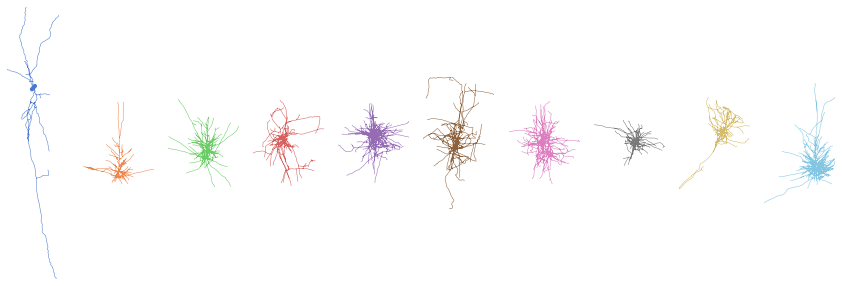

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axes = plt.subplots(1, 10, figsize=(15, 5))

for n, c, ax in zip(neurons, sns.color_palette('muted', len(axes)), axes):
    _ = navis.plot2d(n, method='2d', ax=ax, c=c)
    ax.set_aspect('equal')
    ax.set_axis_off()